# Efficient AD Model For Anomaly Detection

# Summary

- Introduction
- Before running the notebook
- Different Model testing for easiest cookies type (cookies 3)
- Create model for cookies 2
- Create model for cookies 1

## Introduction

The approach is called **EfficientAD**.  
It is a anomaly detection models that takes few milliseconds on a modern GPU to do an inference.

More on [Arxiv](https://arxiv.org/abs/2303.14535)

It creates three models:  
    - Student  
    - Teacher  
    - Auto encoder

This notebooks is used to train multiple models and using [MLFLOW](https://mlflow.org/) to store the images on a remote t2.micro instance on AWS.

The model is trained on a g4dn.xlarge instance.  
If you want to train it on the same instance, make sure to create a support ticket on AWS requesting to have access on the "G series" instances in your region.

## Before running the notebook

Let's prepare the environement before running the notebook.

1. Do you have the datasets ? Download it [here](https://drive.google.com/file/d/19VM3RtzVFyDZ4s0HKJ8eVMnijAKEJdRJ/view?usp=drive_link) and extract it in the `notebooks` folder

2. Run the following command in the terminal from the **`ai`** folder.
```sh
conda create -p envs/2_efficientad python=3.11.7 -y
conda activate envs/2_efficientad

pip install -r requirements/2_efficientad.txt
```

## Model Creation

In [1]:
import sys  # Import the sys module, required to access system-specific parameters and functions  
sys.path.append('../code/')  # Add the '../code/' directory to the path that Python looks in for files to import  
  
# Import all functions from the efficientad_fns module  
from efficientad_fns import *

In [2]:

# Define a dictionary to hold configuration parameters  
config = {  
    "seed": 42,  # Seed for random number generation for reproducibility  
    "on_gpu": torch.cuda.is_available(),  # Boolean flag to use GPU if available  
      
    "out_channels": 384,  # Number of output channels in the model  
    "image_size": 256,  # Size of input images  
      
    "model_type": "small",  # Type of model, identified here as 'small'  
      
    "dataset_path": "datasets",  # Path to the datasets directory  
    "subdataset": "cookies_3",  # Specific sub-dataset to use  
      
    "output_dir": "../output",  # Directory to save output files  
    
    # Usage of weight_path
    # "weight_path": "../weights/teacher_small.pth",
    # Download the model here: https://github.com/nelson1425/EfficientAD/tree/main/models
    # Or pretrain it yourself here: https://github.com/nelson1425/EfficientAD/blob/main/pretraining.py
    "weight_path": "",  # Path to pre-trained weights (empty means no pre-loading)  
      
    "mlflow_tracking_uri": "http://54.90.97.27:5000/",  # URI for MLflow tracking server  
      
    "train_steps": 20,  # Number of training steps  
    "learning_rate": 1e-4,  # Learning rate for model training  
    "weight_decay": 1e-5,  # Weight decay for regularization  
}  

### Different Model testing for easiest cookies type (cookies 3)

- Step = 20,    model = small, weight = none
- Step = 500,   model = small, weight = none
- Step = 5000,  model = small, weight = none
- Step = 10000, model = small, weight = none
- Step = 70000, model = small, weight = none

---

- Step = 20,    model = medium, weight = none
- Step = 500,   model = medium, weight = none
- Step = 5000,  model = medium, weight = none
- Step = 10000, model = medium, weight = none
- ~~Step = 70000, model = medium, weight = none~~

---

- Step = 20,    model = small, weight = on
- Step = 500,   model = small, weight = on
- Step = 5000,  model = small, weight = on
- Step = 10000, model = small, weight = on
- ~~Step = 70000, model = small, weight = on~~

---

- Step = 20,    model = medium, weight = on
- Step = 500,   model = medium, weight = on
- Step = 5000,  model = medium, weight = on
- Step = 10000, model = medium, weight = on
- ~~Step = 70000, model = medium, weight = on~~

- Setting seed to 42
- OK - Setting seed to 42 (1.13 ms)

- Setting datasets path
     Dataset paths: dict_keys(['no_anomaly_train_paths', 'no_anomaly_test_paths', 'no_anomaly_val_paths', 'anomaly_lvl_1_paths', 'anomaly_lvl_2_paths', 'anomaly_lvl_3_paths', 'all_anomaly_paths', 'test_paths', 'all'])
- OK - Setting datasets path (1.94 ms)

- Setting config
     Output folder path: ../output/cookies_3_steps_20_small
- OK - Setting config (4.10 ms)

- Prepare teacher, student & autoencoder
     No weight to load
     Training
- OK - Prepare teacher, student & autoencoder (274.59 ms)

- Normalizing teacher


    Computing std of features: 100%|███████████████████████████████████████████████████████████| 72/72 [00:01<00:00, 55.08it/s]


- OK - Normalizing teacher (2.89 s)

- Train


       Current loss: 28.2339  : 100%|██████████████████████████████████████████████████████████| 20/20 [00:03<00:00,  6.21it/s]


- OK - Train (3.22 s)

- Saving models to ../output/cookies_3_steps_20_small/all_models.pth
- OK - Saving models (67.94 ms)

- Saving map normalization to ../output/cookies_3_steps_20_small/map_normalization.pth


     Map normalisation: 100%|████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 29.28it/s]


- OK - Saving map normalization (305.59 ms)

- Evaluating model


     inference all: 100%|████████████████████████████████████████████████████████████████████| 200/200 [00:08<00:00, 22.88it/s]



     - AUC: 52.10%
    - Optimal Threshold: 0.0818198
    - F1 Score: 0.60
    - CONFUSION MATRIX:
 [[42 58]
 [33 67]] 



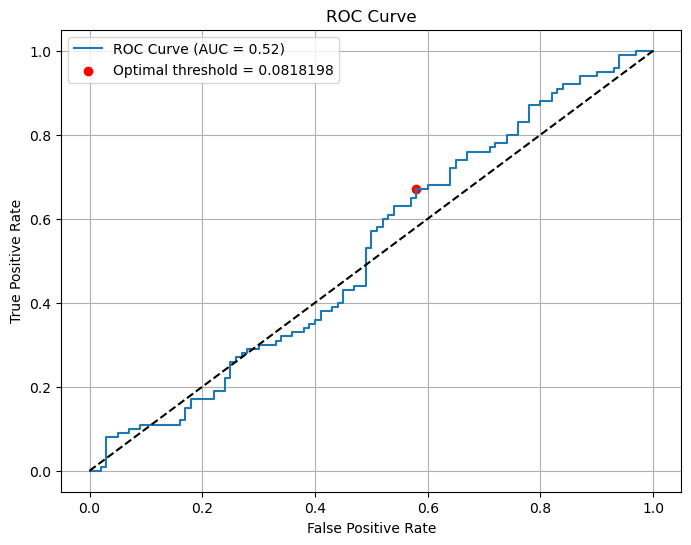

    inference all anomaly: 100%|█████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 23.00it/s]


    inference all no anomaly: 100%|██████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 23.00it/s]


    Test dataset: 100%|██████████████████████████████████████████████████████████████████████| 120/120 [00:05<00:00, 22.93it/s]


- OK - Evaluating model (31.59 s)

Dataset               Accuracy
------------------------------
Anonaly lvl 1            70.00
Anonaly lvl 2            76.00
Anonaly lvl 3            52.00

Anomaly all              67.00

No Anomaly Train         43.75
No Anomaly Test          35.00
No Anomaly All           42.00

All without train        61.67
All with train           54.50


In [3]:
# STEPS = 20, MODEL TYPE = SMALL, WEIGHT = none
model1 = EfficientAD({**config, "train_steps": 20, "model_type": "small", "weight_path":""})
model1.create_model()
model1.display_eval_result()

- Setting seed to 42
- OK - Setting seed to 42 (0.28 ms)

- Setting datasets path
     Dataset paths: dict_keys(['no_anomaly_train_paths', 'no_anomaly_test_paths', 'no_anomaly_val_paths', 'anomaly_lvl_1_paths', 'anomaly_lvl_2_paths', 'anomaly_lvl_3_paths', 'all_anomaly_paths', 'test_paths', 'all'])
- OK - Setting datasets path (3.60 ms)

- Setting config
     Output folder path: ../output/cookies_3_steps_500_small
- OK - Setting config (4.99 ms)

- Prepare teacher, student & autoencoder
     No weight to load
     Training
- OK - Prepare teacher, student & autoencoder (65.61 ms)

- Normalizing teacher


    Computing std of features: 100%|███████████████████████████████████████████████████████████| 72/72 [00:01<00:00, 56.18it/s]


- OK - Normalizing teacher (2.69 s)

- Train


       Current loss: 6.1933  : 100%|█████████████████████████████████████████████████████████| 500/500 [00:59<00:00,  8.34it/s]


- OK - Train (59.94 s)

- Saving models to ../output/cookies_3_steps_500_small/all_models.pth
- OK - Saving models (73.85 ms)

- Saving map normalization to ../output/cookies_3_steps_500_small/map_normalization.pth


     Map normalisation: 100%|████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 30.38it/s]


- OK - Saving map normalization (294.67 ms)

- Evaluating model


     inference all: 100%|████████████████████████████████████████████████████████████████████| 200/200 [00:08<00:00, 23.10it/s]



     - AUC: 88.64%
    - Optimal Threshold: 0.1094586
    - F1 Score: 0.81
    - CONFUSION MATRIX:
 [[92  8]
 [26 74]] 



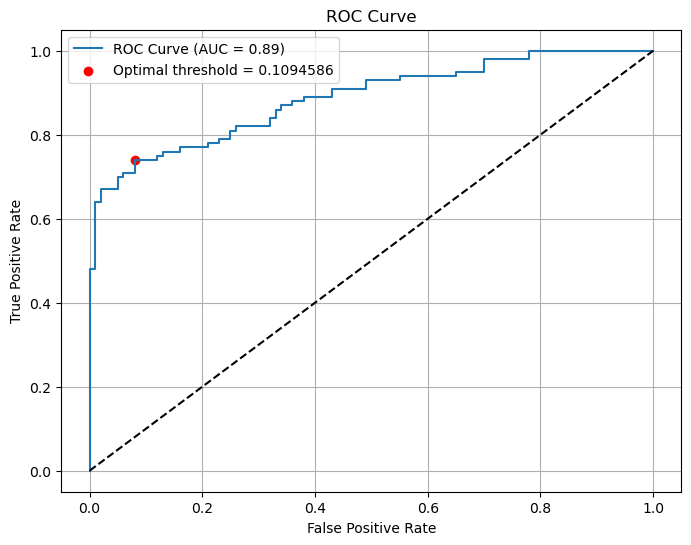

    inference all anomaly: 100%|█████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 22.98it/s]


    inference all no anomaly: 100%|██████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 22.92it/s]


    Test dataset: 100%|██████████████████████████████████████████████████████████████████████| 120/120 [00:05<00:00, 22.80it/s]


- OK - Evaluating model (31.58 s)

Dataset               Accuracy
------------------------------
Anonaly lvl 1           100.00
Anonaly lvl 2            48.00
Anonaly lvl 3            48.00

Anomaly all              74.00

No Anomaly Train         93.75
No Anomaly Test          85.00
No Anomaly All           92.00

All without train        75.83
All with train           83.00


In [4]:
# STEPS = 500, MODEL TYPE = SMALL, WEIGHT = none
model2 = EfficientAD({**config, "train_steps": 500, "model_type": "small", "weight_path":""})
model2.create_model()
model2.display_eval_result()

- Setting seed to 42
- OK - Setting seed to 42 (0.55 ms)

- Setting datasets path
     Dataset paths: dict_keys(['no_anomaly_train_paths', 'no_anomaly_test_paths', 'no_anomaly_val_paths', 'anomaly_lvl_1_paths', 'anomaly_lvl_2_paths', 'anomaly_lvl_3_paths', 'all_anomaly_paths', 'test_paths', 'all'])
- OK - Setting datasets path (2.83 ms)

- Setting config
     Output folder path: ../output/cookies_3_steps_5000_small
- OK - Setting config (6.16 ms)

- Prepare teacher, student & autoencoder
     No weight to load
     Training
- OK - Prepare teacher, student & autoencoder (61.26 ms)

- Normalizing teacher


    Computing std of features: 100%|███████████████████████████████████████████████████████████| 72/72 [00:01<00:00, 53.53it/s]


- OK - Normalizing teacher (2.69 s)

- Train


       Current loss: 0.8730  : 100%|███████████████████████████████████████████████████████| 5000/5000 [10:04<00:00,  8.28it/s]


- OK - Train (604.10 s)

- Saving models to ../output/cookies_3_steps_5000_small/all_models.pth
- OK - Saving models (76.92 ms)

- Saving map normalization to ../output/cookies_3_steps_5000_small/map_normalization.pth


     Map normalisation: 100%|████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 29.84it/s]


- OK - Saving map normalization (299.94 ms)

- Evaluating model


     inference all: 100%|████████████████████████████████████████████████████████████████████| 200/200 [00:08<00:00, 22.84it/s]



     - AUC: 99.21%
    - Optimal Threshold: 0.1119701
    - F1 Score: 0.95
    - CONFUSION MATRIX:
 [[97  3]
 [ 7 93]] 



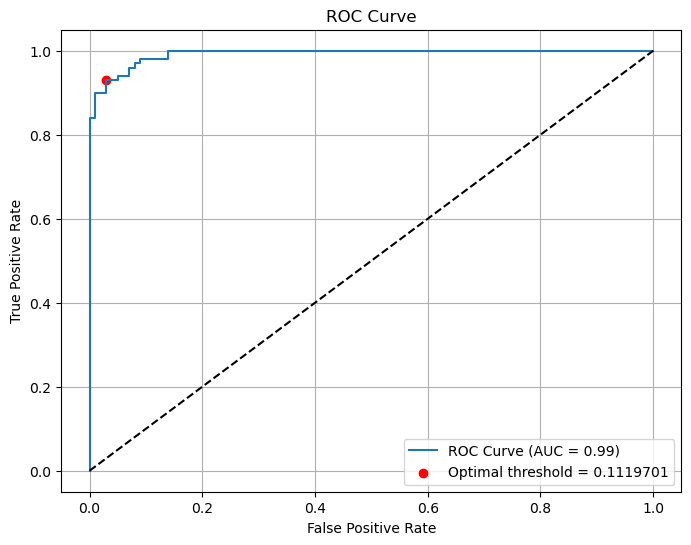

    inference all anomaly: 100%|█████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 23.12it/s]


    inference all no anomaly: 100%|██████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 23.17it/s]


    Test dataset: 100%|██████████████████████████████████████████████████████████████████████| 120/120 [00:05<00:00, 23.18it/s]


- OK - Evaluating model (31.43 s)

Dataset               Accuracy
------------------------------
Anonaly lvl 1           100.00
Anonaly lvl 2            88.00
Anonaly lvl 3            84.00

Anomaly all              93.00

No Anomaly Train         98.75
No Anomaly Test          90.00
No Anomaly All           97.00

All without train        92.50
All with train           95.00


In [5]:
# STEPS = 5000, MODEL TYPE = SMALL, WEIGHT = none
model3 = EfficientAD({**config, "train_steps": 5000, "model_type": "small", "weight_path":""})
model3.create_model()
model3.display_eval_result()

- Setting seed to 42
- OK - Setting seed to 42 (0.49 ms)

- Setting datasets path
     Dataset paths: dict_keys(['no_anomaly_train_paths', 'no_anomaly_test_paths', 'no_anomaly_val_paths', 'anomaly_lvl_1_paths', 'anomaly_lvl_2_paths', 'anomaly_lvl_3_paths', 'all_anomaly_paths', 'test_paths', 'all'])
- OK - Setting datasets path (2.37 ms)

- Setting config
     Output folder path: ../output/cookies_3_steps_10000_small
- OK - Setting config (3.79 ms)

- Prepare teacher, student & autoencoder
     No weight to load
     Training
- OK - Prepare teacher, student & autoencoder (63.69 ms)

- Normalizing teacher


    Computing std of features: 100%|███████████████████████████████████████████████████████████| 72/72 [00:01<00:00, 54.49it/s]


- OK - Normalizing teacher (2.68 s)

- Train


       Current loss: 0.4457  : 100%|█████████████████████████████████████████████████████| 10000/10000 [20:10<00:00,  8.26it/s]


- OK - Train (1210.36 s)

- Saving models to ../output/cookies_3_steps_10000_small/all_models.pth
- OK - Saving models (76.54 ms)

- Saving map normalization to ../output/cookies_3_steps_10000_small/map_normalization.pth


     Map normalisation: 100%|████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 29.21it/s]


- OK - Saving map normalization (306.73 ms)

- Evaluating model


     inference all: 100%|████████████████████████████████████████████████████████████████████| 200/200 [00:08<00:00, 22.71it/s]



     - AUC: 99.68%
    - Optimal Threshold: 0.1156689
    - F1 Score: 0.98
    - CONFUSION MATRIX:
 [[97  3]
 [ 2 98]] 



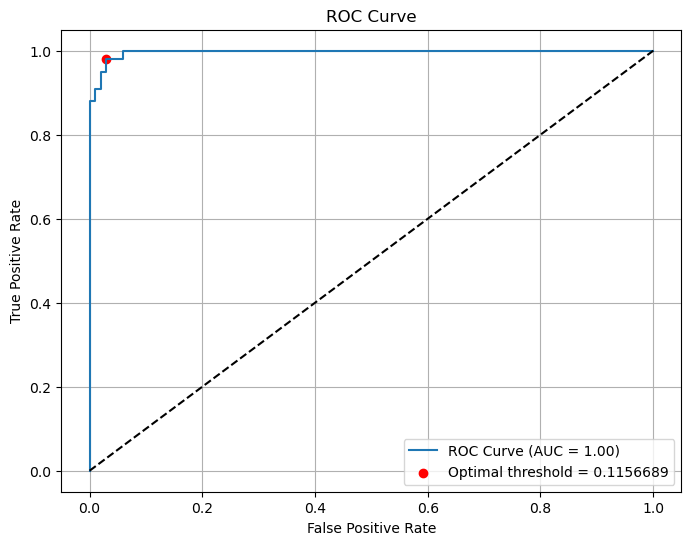

    inference all anomaly: 100%|█████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 22.97it/s]


    inference all no anomaly: 100%|██████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 23.15it/s]


    Test dataset: 100%|██████████████████████████████████████████████████████████████████████| 120/120 [00:05<00:00, 23.08it/s]


- OK - Evaluating model (31.59 s)

Dataset               Accuracy
------------------------------
Anonaly lvl 1           100.00
Anonaly lvl 2            92.00
Anonaly lvl 3           100.00

Anomaly all              98.00

No Anomaly Train         98.75
No Anomaly Test          90.00
No Anomaly All           97.00

All without train        96.67
All with train           97.50


In [6]:
# STEPS = 10000, MODEL TYPE = SMALL, WEIGHT = none
model4 = EfficientAD({**config, "train_steps": 10000, "model_type": "small", "weight_path":""})
model4.create_model()
model4.display_eval_result()

In [7]:
# To save:  
torch.save({  
    'q_st_start': model4.q_st_start,  
    'q_st_end': model4.q_st_end,  
    'q_ae_start': model4.q_ae_start,  
    'q_ae_end': model4.q_ae_end  
}, "test.pth")

- Setting seed to 42
- OK - Setting seed to 42 (0.27 ms)

- Setting datasets path
     Dataset paths: dict_keys(['no_anomaly_train_paths', 'no_anomaly_test_paths', 'no_anomaly_val_paths', 'anomaly_lvl_1_paths', 'anomaly_lvl_2_paths', 'anomaly_lvl_3_paths', 'all_anomaly_paths', 'test_paths', 'all'])
- OK - Setting datasets path (2.93 ms)

- Setting config
     Output folder path: ../output/cookies_3_steps_70000_small
- OK - Setting config (0.58 ms)

- Prepare teacher, student & autoencoder
     No weight to load
     Training
- OK - Prepare teacher, student & autoencoder (61.52 ms)

- Normalizing teacher


    Computing std of features: 100%|███████████████████████████████████████████████████████████| 72/72 [00:01<00:00, 54.23it/s]


- OK - Normalizing teacher (2.68 s)

- Train


       Current loss: 0.1277  : 100%|███████████████████████████████████████████████████| 70000/70000 [2:20:48<00:00,  8.29it/s]


- OK - Train (8448.14 s)

- Saving models to ../output/cookies_3_steps_70000_small/all_models.pth
- OK - Saving models (78.08 ms)

- Saving map normalization to ../output/cookies_3_steps_70000_small/map_normalization.pth


     Map normalisation: 100%|████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 29.40it/s]


- OK - Saving map normalization (303.73 ms)

- Evaluating model


     inference all: 100%|████████████████████████████████████████████████████████████████████| 200/200 [00:08<00:00, 23.20it/s]



     - AUC: 99.69%
    - Optimal Threshold: 0.1502251
    - F1 Score: 0.97
    - CONFUSION MATRIX:
 [[99  1]
 [ 5 95]] 



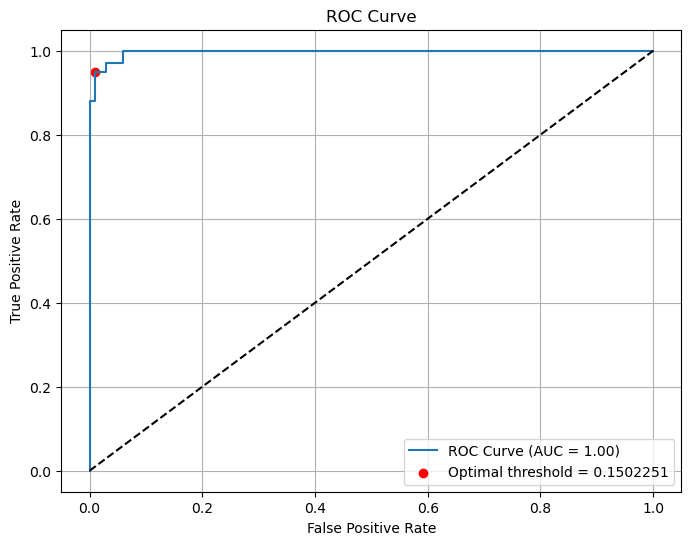

    inference all anomaly: 100%|█████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 23.22it/s]


    inference all no anomaly: 100%|██████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 23.21it/s]


    Test dataset: 100%|██████████████████████████████████████████████████████████████████████| 120/120 [00:05<00:00, 23.19it/s]


- OK - Evaluating model (31.26 s)

Dataset               Accuracy
------------------------------
Anonaly lvl 1           100.00
Anonaly lvl 2            88.00
Anonaly lvl 3            92.00

Anomaly all              95.00

No Anomaly Train        100.00
No Anomaly Test          95.00
No Anomaly All           99.00

All without train        95.00
All with train           97.00


In [9]:
# STEPS = 70000, MODEL TYPE = SMALL, WEIGHT = none
model5 = EfficientAD({**config, "train_steps": 70000, "model_type": "small", "weight_path":""})
model5.create_model()
model5.display_eval_result()

---

- Setting seed to 42
- OK - Setting seed to 42 (2.33 ms)

- Setting datasets path
     Dataset paths: dict_keys(['no_anomaly_train_paths', 'no_anomaly_test_paths', 'no_anomaly_val_paths', 'anomaly_lvl_1_paths', 'anomaly_lvl_2_paths', 'anomaly_lvl_3_paths', 'all_anomaly_paths', 'test_paths', 'all'])
- OK - Setting datasets path (1.95 ms)

- Setting config
     Output folder path: ../output/cookies_3_steps_20_medium
- OK - Setting config (0.10 ms)

- Prepare teacher, student & autoencoder
     No weight to load
     Training
- OK - Prepare teacher, student & autoencoder (172.64 ms)

- Normalizing teacher


    Computing std of features: 100%|███████████████████████████████████████████████████████████| 72/72 [00:03<00:00, 22.89it/s]


- OK - Normalizing teacher (6.29 s)

- Train


       Current loss: 32.1385  : 100%|██████████████████████████████████████████████████████████| 20/20 [00:06<00:00,  3.10it/s]


- OK - Train (6.46 s)

- Saving models to ../output/cookies_3_steps_20_medium/all_models.pth
- OK - Saving models (190.81 ms)

- Saving map normalization to ../output/cookies_3_steps_20_medium/map_normalization.pth


     Map normalisation: 100%|████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.39it/s]


- OK - Saving map normalization (797.40 ms)

- Evaluating model


     inference all: 100%|████████████████████████████████████████████████████████████████████| 200/200 [00:21<00:00,  9.47it/s]



     - AUC: 50.78%
    - Optimal Threshold: 0.0653680
    - F1 Score: 0.66
    - CONFUSION MATRIX:
 [[27 73]
 [15 85]] 



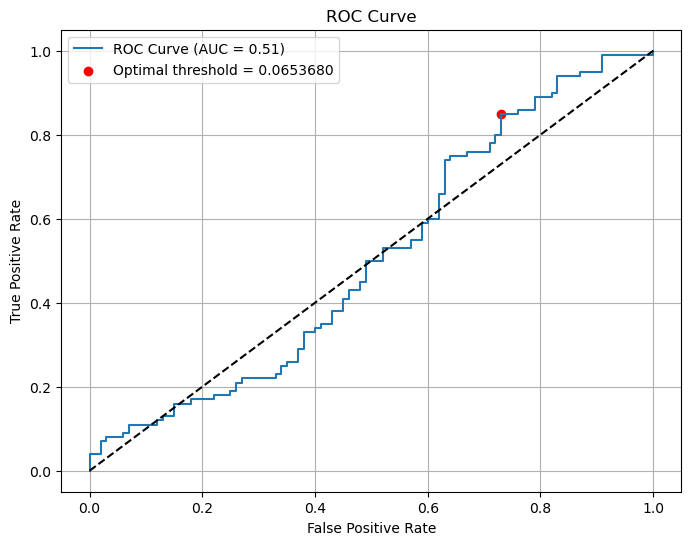

    inference all anomaly: 100%|█████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.44it/s]


    inference all no anomaly: 100%|██████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.42it/s]


    Test dataset: 100%|██████████████████████████████████████████████████████████████████████| 120/120 [00:12<00:00,  9.42it/s]


- OK - Evaluating model (76.48 s)

Dataset               Accuracy
------------------------------
Anonaly lvl 1            94.00
Anonaly lvl 2            92.00
Anonaly lvl 3            60.00

Anomaly all              85.00

No Anomaly Train         27.50
No Anomaly Test          25.00
No Anomaly All           27.00

All without train        75.00
All with train           56.00


In [10]:
# STEPS = 20, MODEL TYPE = MEDIUM, WEIGHT = none
model6 = EfficientAD({**config, "train_steps": 20, "model_type": "medium", "weight_path":""})
model6.create_model()
model6.display_eval_result()

- Setting seed to 42
- OK - Setting seed to 42 (0.28 ms)

- Setting datasets path
     Dataset paths: dict_keys(['no_anomaly_train_paths', 'no_anomaly_test_paths', 'no_anomaly_val_paths', 'anomaly_lvl_1_paths', 'anomaly_lvl_2_paths', 'anomaly_lvl_3_paths', 'all_anomaly_paths', 'test_paths', 'all'])
- OK - Setting datasets path (3.72 ms)

- Setting config
     Output folder path: ../output/cookies_3_steps_500_medium
- OK - Setting config (0.12 ms)

- Prepare teacher, student & autoencoder
     No weight to load
     Training
- OK - Prepare teacher, student & autoencoder (162.90 ms)

- Normalizing teacher


    Computing std of features: 100%|███████████████████████████████████████████████████████████| 72/72 [00:03<00:00, 22.84it/s]


- OK - Normalizing teacher (6.33 s)

- Train


       Current loss: 2.5265  : 100%|█████████████████████████████████████████████████████████| 500/500 [02:39<00:00,  3.13it/s]


- OK - Train (159.76 s)

- Saving models to ../output/cookies_3_steps_500_medium/all_models.pth
- OK - Saving models (200.47 ms)

- Saving map normalization to ../output/cookies_3_steps_500_medium/map_normalization.pth


     Map normalisation: 100%|████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.32it/s]


- OK - Saving map normalization (801.11 ms)

- Evaluating model


     inference all: 100%|████████████████████████████████████████████████████████████████████| 200/200 [00:21<00:00,  9.45it/s]



     - AUC: 91.19%
    - Optimal Threshold: 0.0865702
    - F1 Score: 0.85
    - CONFUSION MATRIX:
 [[96  4]
 [23 77]] 



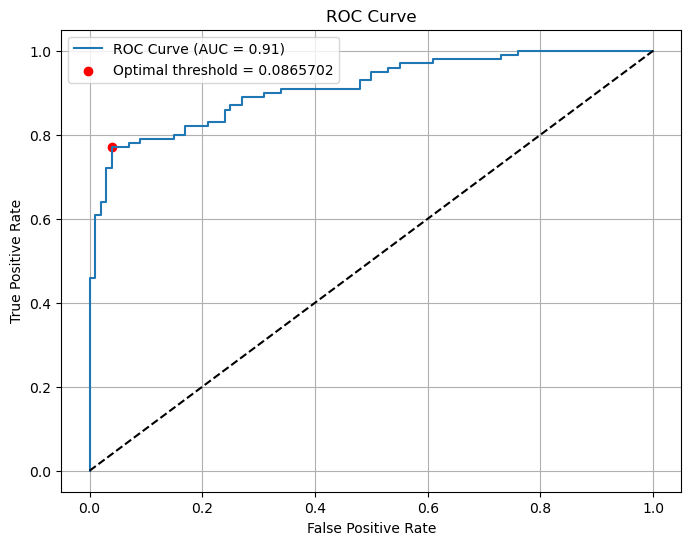

    inference all anomaly: 100%|█████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.47it/s]


    inference all no anomaly: 100%|██████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.49it/s]


    Test dataset: 100%|██████████████████████████████████████████████████████████████████████| 120/120 [00:12<00:00,  9.48it/s]


- OK - Evaluating model (76.28 s)

Dataset               Accuracy
------------------------------
Anonaly lvl 1           100.00
Anonaly lvl 2            52.00
Anonaly lvl 3            56.00

Anomaly all              77.00

No Anomaly Train         98.75
No Anomaly Test          85.00
No Anomaly All           96.00

All without train        78.33
All with train           86.50


In [11]:
# STEPS = 500, MODEL TYPE = MEDIUM, WEIGHT = none
model7 = EfficientAD({**config, "train_steps": 500, "model_type": "medium", "weight_path":""})
model7.create_model()
model7.display_eval_result()

- Setting seed to 42
- OK - Setting seed to 42 (0.67 ms)

- Setting datasets path
     Dataset paths: dict_keys(['no_anomaly_train_paths', 'no_anomaly_test_paths', 'no_anomaly_val_paths', 'anomaly_lvl_1_paths', 'anomaly_lvl_2_paths', 'anomaly_lvl_3_paths', 'all_anomaly_paths', 'test_paths', 'all'])
- OK - Setting datasets path (2.89 ms)

- Setting config
     Output folder path: ../output/cookies_3_steps_5000_medium
- OK - Setting config (0.10 ms)

- Prepare teacher, student & autoencoder
     No weight to load
     Training
- OK - Prepare teacher, student & autoencoder (153.69 ms)

- Normalizing teacher


    Computing std of features: 100%|███████████████████████████████████████████████████████████| 72/72 [00:03<00:00, 22.93it/s]


- OK - Normalizing teacher (6.33 s)

- Train


       Current loss: 0.7681  : 100%|███████████████████████████████████████████████████████| 5000/5000 [26:42<00:00,  3.12it/s]


- OK - Train (1602.36 s)

- Saving models to ../output/cookies_3_steps_5000_medium/all_models.pth
- OK - Saving models (199.26 ms)

- Saving map normalization to ../output/cookies_3_steps_5000_medium/map_normalization.pth


     Map normalisation: 100%|████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.35it/s]


- OK - Saving map normalization (798.86 ms)

- Evaluating model


     inference all: 100%|████████████████████████████████████████████████████████████████████| 200/200 [00:21<00:00,  9.41it/s]



     - AUC: 99.14%
    - Optimal Threshold: 0.0991140
    - F1 Score: 0.96
    - CONFUSION MATRIX:
 [[97  3]
 [ 5 95]] 



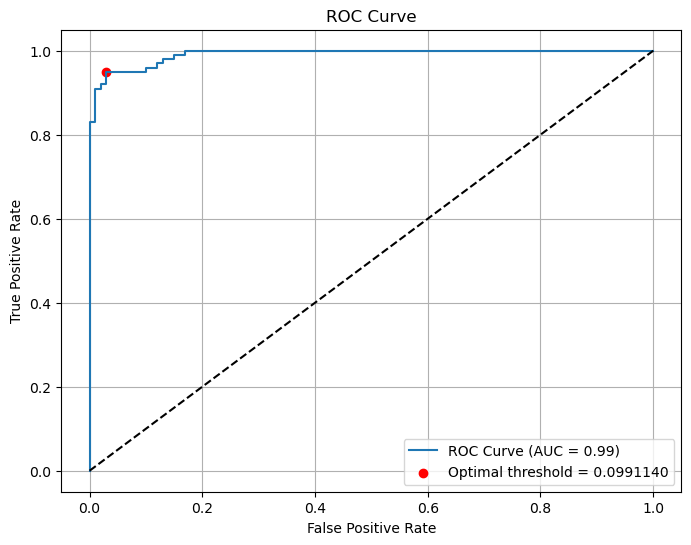

    inference all anomaly: 100%|█████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.42it/s]


    inference all no anomaly: 100%|██████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.39it/s]


    Test dataset: 100%|██████████████████████████████████████████████████████████████████████| 120/120 [00:12<00:00,  9.41it/s]


- OK - Evaluating model (76.74 s)

Dataset               Accuracy
------------------------------
Anonaly lvl 1           100.00
Anonaly lvl 2            84.00
Anonaly lvl 3            96.00

Anomaly all              95.00

No Anomaly Train         98.75
No Anomaly Test          90.00
No Anomaly All           97.00

All without train        94.17
All with train           96.00


In [12]:
# STEPS = 5000, MODEL TYPE = MEDIUM, WEIGHT = none
model8 = EfficientAD({**config, "train_steps": 5000, "model_type": "medium", "weight_path":""})
model8.create_model()
model8.display_eval_result()

- Setting seed to 42
- OK - Setting seed to 42 (0.63 ms)

- Setting datasets path
     Dataset paths: dict_keys(['no_anomaly_train_paths', 'no_anomaly_test_paths', 'no_anomaly_val_paths', 'anomaly_lvl_1_paths', 'anomaly_lvl_2_paths', 'anomaly_lvl_3_paths', 'all_anomaly_paths', 'test_paths', 'all'])
- OK - Setting datasets path (3.28 ms)

- Setting config
     Output folder path: ../output/cookies_3_steps_10000_medium
- OK - Setting config (0.11 ms)

- Prepare teacher, student & autoencoder
     No weight to load
     Training
- OK - Prepare teacher, student & autoencoder (159.12 ms)

- Normalizing teacher


    Computing std of features: 100%|███████████████████████████████████████████████████████████| 72/72 [00:03<00:00, 22.91it/s]


- OK - Normalizing teacher (6.35 s)

- Train


       Current loss: 0.4128  : 100%|█████████████████████████████████████████████████████| 10000/10000 [53:23<00:00,  3.12it/s]


- OK - Train (3203.09 s)

- Saving models to ../output/cookies_3_steps_10000_medium/all_models.pth
- OK - Saving models (200.33 ms)

- Saving map normalization to ../output/cookies_3_steps_10000_medium/map_normalization.pth


     Map normalisation: 100%|████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.38it/s]


- OK - Saving map normalization (797.16 ms)

- Evaluating model


     inference all: 100%|████████████████████████████████████████████████████████████████████| 200/200 [00:21<00:00,  9.45it/s]



     - AUC: 99.46%
    - Optimal Threshold: 0.1133724
    - F1 Score: 0.96
    - CONFUSION MATRIX:
 [[97  3]
 [ 4 96]] 



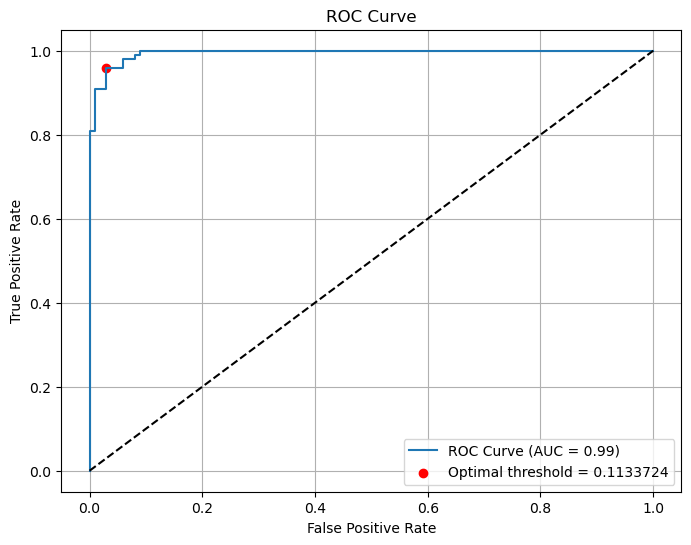

    inference all anomaly: 100%|█████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.42it/s]


    inference all no anomaly: 100%|██████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.47it/s]


    Test dataset: 100%|██████████████████████████████████████████████████████████████████████| 120/120 [00:12<00:00,  9.47it/s]


- OK - Evaluating model (76.41 s)

Dataset               Accuracy
------------------------------
Anonaly lvl 1           100.00
Anonaly lvl 2            84.00
Anonaly lvl 3           100.00

Anomaly all              96.00

No Anomaly Train         98.75
No Anomaly Test          90.00
No Anomaly All           97.00

All without train        95.00
All with train           96.50


In [13]:
# STEPS = 10000, MODEL TYPE = MEDIUM, WEIGHT = none
model9 = EfficientAD({**config, "train_steps": 10000, "model_type": "medium", "weight_path":""})
model9.create_model()
model9.display_eval_result()

---

- Setting seed to 42
- OK - Setting seed to 42 (0.24 ms)

- Setting datasets path
     Dataset paths: dict_keys(['no_anomaly_train_paths', 'no_anomaly_test_paths', 'no_anomaly_val_paths', 'anomaly_lvl_1_paths', 'anomaly_lvl_2_paths', 'anomaly_lvl_3_paths', 'all_anomaly_paths', 'test_paths', 'all'])
- OK - Setting datasets path (3.19 ms)

- Setting config
     Output folder path: ../output/cookies_3_steps_20_small_weighted
- OK - Setting config (0.10 ms)

- Prepare teacher, student & autoencoder
     Loading weight ../weights/teacher_small.pth
     Training
- OK - Prepare teacher, student & autoencoder (76.65 ms)

- Normalizing teacher


    Computing std of features: 100%|███████████████████████████████████████████████████████████| 72/72 [00:01<00:00, 54.27it/s]


- OK - Normalizing teacher (2.68 s)

- Train


       Current loss: 40.6282  : 100%|██████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  8.00it/s]


- OK - Train (2.50 s)

- Saving models to ../output/cookies_3_steps_20_small_weighted/all_models.pth
- OK - Saving models (79.82 ms)

- Saving map normalization to ../output/cookies_3_steps_20_small_weighted/map_normalization.pth


     Map normalisation: 100%|████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 29.45it/s]


- OK - Saving map normalization (304.86 ms)

- Evaluating model


     inference all: 100%|████████████████████████████████████████████████████████████████████| 200/200 [00:08<00:00, 22.98it/s]



     - AUC: 77.20%
    - Optimal Threshold: 0.1018831
    - F1 Score: 0.75
    - CONFUSION MATRIX:
 [[62 38]
 [17 83]] 



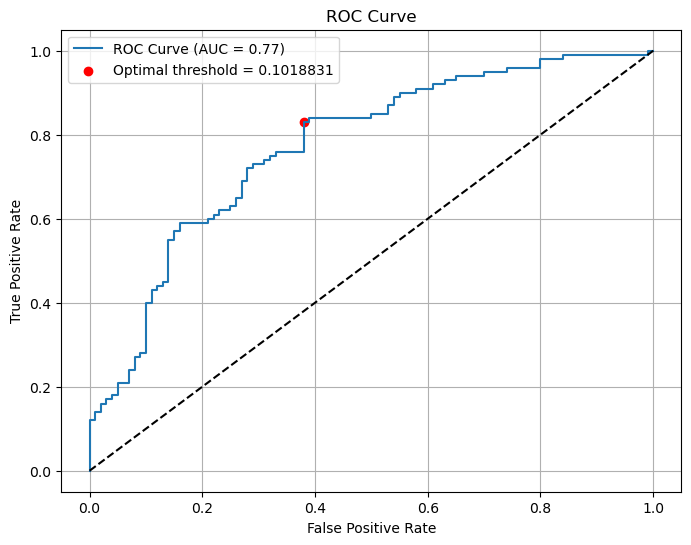

    inference all anomaly: 100%|█████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 23.23it/s]


    inference all no anomaly: 100%|██████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 23.16it/s]


    Test dataset: 100%|██████████████████████████████████████████████████████████████████████| 120/120 [00:05<00:00, 23.18it/s]


- OK - Evaluating model (31.34 s)

Dataset               Accuracy
------------------------------
Anonaly lvl 1            96.00
Anonaly lvl 2            88.00
Anonaly lvl 3            52.00

Anomaly all              83.00

No Anomaly Train         60.00
No Anomaly Test          70.00
No Anomaly All           62.00

All without train        80.83
All with train           72.50


In [15]:
# STEPS = 20, MODEL TYPE = SMALL, WEIGHT = on
model11 = EfficientAD({**config, "train_steps": 20, "model_type": "small", "weight_path":"../weights/teacher_small.pth"})
model11.create_model()
model11.display_eval_result()

- Setting seed to 42
- OK - Setting seed to 42 (0.70 ms)

- Setting datasets path
     Dataset paths: dict_keys(['no_anomaly_train_paths', 'no_anomaly_test_paths', 'no_anomaly_val_paths', 'anomaly_lvl_1_paths', 'anomaly_lvl_2_paths', 'anomaly_lvl_3_paths', 'all_anomaly_paths', 'test_paths', 'all'])
- OK - Setting datasets path (2.55 ms)

- Setting config
     Output folder path: ../output/cookies_3_steps_500_small_weighted
- OK - Setting config (0.10 ms)

- Prepare teacher, student & autoencoder
     Loading weight ../weights/teacher_small.pth
     Training
- OK - Prepare teacher, student & autoencoder (76.63 ms)

- Normalizing teacher


    Computing std of features: 100%|███████████████████████████████████████████████████████████| 72/72 [00:01<00:00, 53.43it/s]


- OK - Normalizing teacher (2.67 s)

- Train


       Current loss: 8.0053  : 100%|█████████████████████████████████████████████████████████| 500/500 [01:00<00:00,  8.27it/s]


- OK - Train (60.47 s)

- Saving models to ../output/cookies_3_steps_500_small_weighted/all_models.pth
- OK - Saving models (79.77 ms)

- Saving map normalization to ../output/cookies_3_steps_500_small_weighted/map_normalization.pth


     Map normalisation: 100%|████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 30.26it/s]


- OK - Saving map normalization (296.61 ms)

- Evaluating model


     inference all: 100%|████████████████████████████████████████████████████████████████████| 200/200 [00:08<00:00, 23.14it/s]



     - AUC: 99.82%
    - Optimal Threshold: 0.3038742
    - F1 Score: 0.97
    - CONFUSION MATRIX:
 [[100   0]
 [  5  95]] 



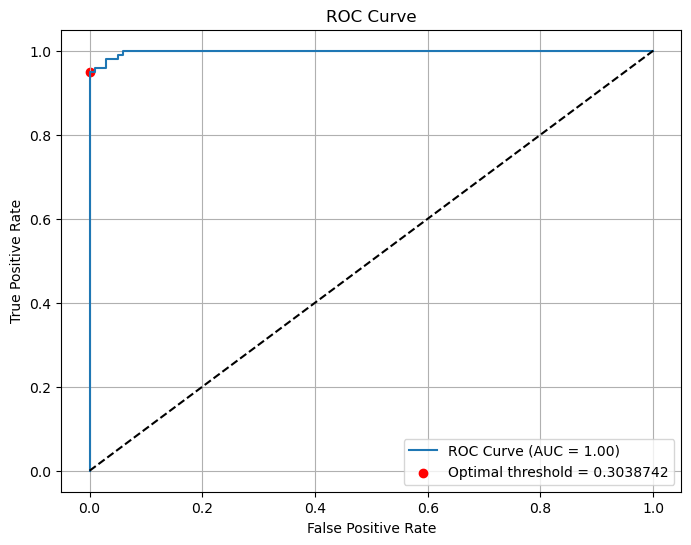

    inference all anomaly: 100%|█████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 22.91it/s]


    inference all no anomaly: 100%|██████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 22.95it/s]


    Test dataset: 100%|██████████████████████████████████████████████████████████████████████| 120/120 [00:05<00:00, 22.92it/s]


- OK - Evaluating model (31.57 s)

Dataset               Accuracy
------------------------------
Anonaly lvl 1           100.00
Anonaly lvl 2           100.00
Anonaly lvl 3            80.00

Anomaly all              95.00

No Anomaly Train        100.00
No Anomaly Test         100.00
No Anomaly All          100.00

All without train        95.83
All with train           97.50


In [16]:
# STEPS = 500, MODEL TYPE = SMALL, WEIGHT = on
model12 = EfficientAD({**config, "train_steps": 500, "model_type": "small", "weight_path":"../weights/teacher_small.pth"})
model12.create_model()
model12.display_eval_result()

- Setting seed to 42
- OK - Setting seed to 42 (0.26 ms)

- Setting datasets path
     Dataset paths: dict_keys(['no_anomaly_train_paths', 'no_anomaly_test_paths', 'no_anomaly_val_paths', 'anomaly_lvl_1_paths', 'anomaly_lvl_2_paths', 'anomaly_lvl_3_paths', 'all_anomaly_paths', 'test_paths', 'all'])
- OK - Setting datasets path (3.11 ms)

- Setting config
     Output folder path: ../output/cookies_3_steps_5000_small_weighted
- OK - Setting config (0.11 ms)

- Prepare teacher, student & autoencoder
     Loading weight ../weights/teacher_small.pth
     Training
- OK - Prepare teacher, student & autoencoder (74.94 ms)

- Normalizing teacher


    Computing std of features: 100%|███████████████████████████████████████████████████████████| 72/72 [00:01<00:00, 53.52it/s]


- OK - Normalizing teacher (2.71 s)

- Train


       Current loss: 5.6433  : 100%|███████████████████████████████████████████████████████| 5000/5000 [10:08<00:00,  8.22it/s]


- OK - Train (608.47 s)

- Saving models to ../output/cookies_3_steps_5000_small_weighted/all_models.pth
- OK - Saving models (82.01 ms)

- Saving map normalization to ../output/cookies_3_steps_5000_small_weighted/map_normalization.pth


     Map normalisation: 100%|████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 29.54it/s]


- OK - Saving map normalization (304.11 ms)

- Evaluating model


     inference all: 100%|████████████████████████████████████████████████████████████████████| 200/200 [00:08<00:00, 22.93it/s]



     - AUC: 100.00%
    - Optimal Threshold: 0.3997492
    - F1 Score: 1.00
    - CONFUSION MATRIX:
 [[100   0]
 [  0 100]] 



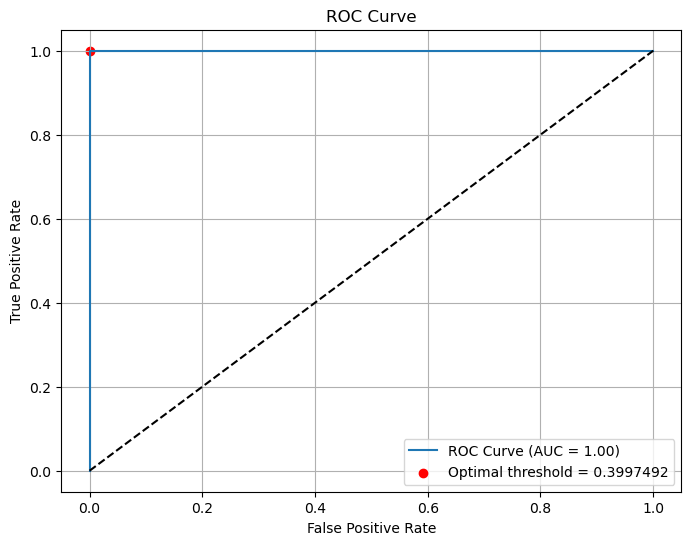

    inference all anomaly: 100%|█████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 23.11it/s]


    inference all no anomaly: 100%|██████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 23.03it/s]


    Test dataset: 100%|██████████████████████████████████████████████████████████████████████| 120/120 [00:05<00:00, 23.06it/s]


- OK - Evaluating model (31.52 s)

Dataset               Accuracy
------------------------------
Anonaly lvl 1           100.00
Anonaly lvl 2           100.00
Anonaly lvl 3           100.00

Anomaly all             100.00

No Anomaly Train        100.00
No Anomaly Test         100.00
No Anomaly All          100.00

All without train       100.00
All with train          100.00


In [17]:
# STEPS = 5000, MODEL TYPE = SMALL, WEIGHT = on
model13 = EfficientAD({**config, "train_steps": 5000, "model_type": "small", "weight_path":"../weights/teacher_small.pth"})
model13.create_model()
model13.display_eval_result()

- Setting seed to 42
- OK - Setting seed to 42 (0.26 ms)

- Setting datasets path
     Dataset paths: dict_keys(['no_anomaly_train_paths', 'no_anomaly_test_paths', 'no_anomaly_val_paths', 'anomaly_lvl_1_paths', 'anomaly_lvl_2_paths', 'anomaly_lvl_3_paths', 'all_anomaly_paths', 'test_paths', 'all'])
- OK - Setting datasets path (3.31 ms)

- Setting config
     Output folder path: ../output/cookies_3_steps_10000_small_weighted
- OK - Setting config (0.11 ms)

- Prepare teacher, student & autoencoder
     Loading weight ../weights/teacher_small.pth
     Training
- OK - Prepare teacher, student & autoencoder (73.51 ms)

- Normalizing teacher


    Computing std of features: 100%|███████████████████████████████████████████████████████████| 72/72 [00:01<00:00, 54.24it/s]


- OK - Normalizing teacher (2.71 s)

- Train


       Current loss: 3.6031  : 100%|█████████████████████████████████████████████████████| 10000/10000 [20:16<00:00,  8.22it/s]


- OK - Train (1216.70 s)

- Saving models to ../output/cookies_3_steps_10000_small_weighted/all_models.pth
- OK - Saving models (79.84 ms)

- Saving map normalization to ../output/cookies_3_steps_10000_small_weighted/map_normalization.pth


     Map normalisation: 100%|████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 29.48it/s]


- OK - Saving map normalization (304.57 ms)

- Evaluating model


     inference all: 100%|████████████████████████████████████████████████████████████████████| 200/200 [00:08<00:00, 22.82it/s]



     - AUC: 100.00%
    - Optimal Threshold: 0.4698580
    - F1 Score: 1.00
    - CONFUSION MATRIX:
 [[100   0]
 [  0 100]] 



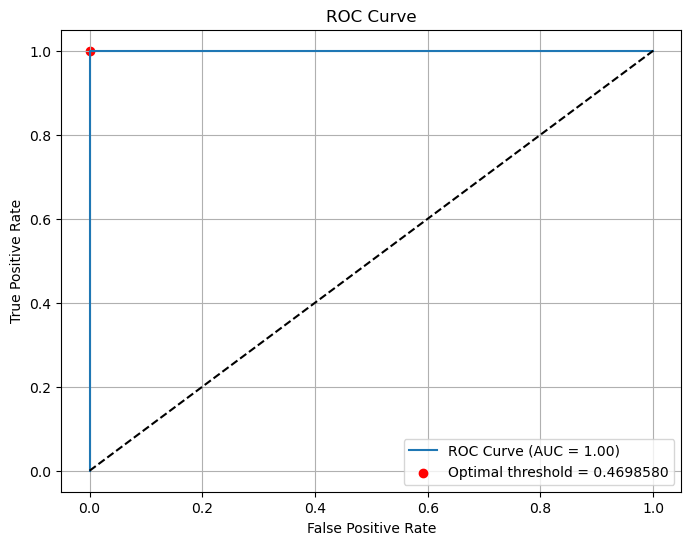

    inference all anomaly: 100%|█████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 22.96it/s]


    inference all no anomaly: 100%|██████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 22.90it/s]


    Test dataset: 100%|██████████████████████████████████████████████████████████████████████| 120/120 [00:05<00:00, 22.86it/s]


- OK - Evaluating model (31.85 s)

Dataset               Accuracy
------------------------------
Anonaly lvl 1           100.00
Anonaly lvl 2           100.00
Anonaly lvl 3           100.00

Anomaly all             100.00

No Anomaly Train        100.00
No Anomaly Test         100.00
No Anomaly All          100.00

All without train       100.00
All with train          100.00


In [18]:
# STEPS = 10000, MODEL TYPE = SMALL, WEIGHT = on
model14 = EfficientAD({**config, "train_steps": 10000, "model_type": "small", "weight_path":"../weights/teacher_small.pth"})
model14.create_model()
model14.display_eval_result()

---

- Setting seed to 42
- OK - Setting seed to 42 (0.20 ms)

- Setting datasets path
     Dataset paths: dict_keys(['no_anomaly_train_paths', 'no_anomaly_test_paths', 'no_anomaly_val_paths', 'anomaly_lvl_1_paths', 'anomaly_lvl_2_paths', 'anomaly_lvl_3_paths', 'all_anomaly_paths', 'test_paths', 'all'])
- OK - Setting datasets path (2.65 ms)

- Setting config
     Output folder path: ../output/cookies_3_steps_20_medium_weighted
- OK - Setting config (0.10 ms)

- Prepare teacher, student & autoencoder
     Loading weight ../weights/teacher_medium.pth
     Training
- OK - Prepare teacher, student & autoencoder (208.75 ms)

- Normalizing teacher


    Computing std of features: 100%|███████████████████████████████████████████████████████████| 72/72 [00:03<00:00, 22.59it/s]


- OK - Normalizing teacher (6.40 s)

- Train


       Current loss: 37.6393  : 100%|██████████████████████████████████████████████████████████| 20/20 [00:06<00:00,  3.07it/s]


- OK - Train (6.52 s)

- Saving models to ../output/cookies_3_steps_20_medium_weighted/all_models.pth
- OK - Saving models (202.60 ms)

- Saving map normalization to ../output/cookies_3_steps_20_medium_weighted/map_normalization.pth


     Map normalisation: 100%|████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.31it/s]


- OK - Saving map normalization (801.08 ms)

- Evaluating model


     inference all: 100%|████████████████████████████████████████████████████████████████████| 200/200 [00:21<00:00,  9.37it/s]



     - AUC: 64.58%
    - Optimal Threshold: 0.0098568
    - F1 Score: 0.71
    - CONFUSION MATRIX:
 [[36 64]
 [ 9 91]] 



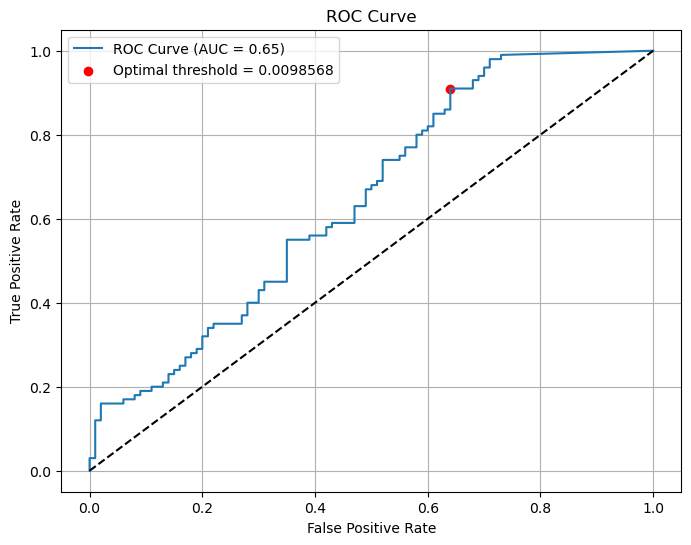

    inference all anomaly: 100%|█████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.39it/s]


    inference all no anomaly: 100%|██████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.36it/s]


    Test dataset: 100%|██████████████████████████████████████████████████████████████████████| 120/120 [00:12<00:00,  9.38it/s]


- OK - Evaluating model (77.00 s)

Dataset               Accuracy
------------------------------
Anonaly lvl 1            82.00
Anonaly lvl 2           100.00
Anonaly lvl 3           100.00

Anomaly all              91.00

No Anomaly Train         36.25
No Anomaly Test          35.00
No Anomaly All           36.00

All without train        81.67
All with train           63.50


In [19]:
# STEPS = 20, MODEL TYPE = MEDIUM, WEIGHT = on
model16 = EfficientAD({**config, "train_steps": 20, "model_type": "medium", "weight_path":"../weights/teacher_medium.pth"})
model16.create_model()
model16.display_eval_result()

- Setting seed to 42
- OK - Setting seed to 42 (0.27 ms)

- Setting datasets path
     Dataset paths: dict_keys(['no_anomaly_train_paths', 'no_anomaly_test_paths', 'no_anomaly_val_paths', 'anomaly_lvl_1_paths', 'anomaly_lvl_2_paths', 'anomaly_lvl_3_paths', 'all_anomaly_paths', 'test_paths', 'all'])
- OK - Setting datasets path (3.29 ms)

- Setting config
     Output folder path: ../output/cookies_3_steps_500_medium_weighted
- OK - Setting config (0.10 ms)

- Prepare teacher, student & autoencoder
     Loading weight ../weights/teacher_medium.pth
     Training
- OK - Prepare teacher, student & autoencoder (188.02 ms)

- Normalizing teacher


    Computing std of features: 100%|███████████████████████████████████████████████████████████| 72/72 [00:03<00:00, 22.49it/s]


- OK - Normalizing teacher (6.44 s)

- Train


       Current loss: 9.1853  : 100%|█████████████████████████████████████████████████████████| 500/500 [02:41<00:00,  3.09it/s]


- OK - Train (161.58 s)

- Saving models to ../output/cookies_3_steps_500_medium_weighted/all_models.pth
- OK - Saving models (202.63 ms)

- Saving map normalization to ../output/cookies_3_steps_500_medium_weighted/map_normalization.pth


     Map normalisation: 100%|████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.27it/s]


- OK - Saving map normalization (804.28 ms)

- Evaluating model


     inference all: 100%|████████████████████████████████████████████████████████████████████| 200/200 [00:21<00:00,  9.40it/s]



     - AUC: 99.43%
    - Optimal Threshold: 0.2382182
    - F1 Score: 0.96
    - CONFUSION MATRIX:
 [[ 92   8]
 [  0 100]] 



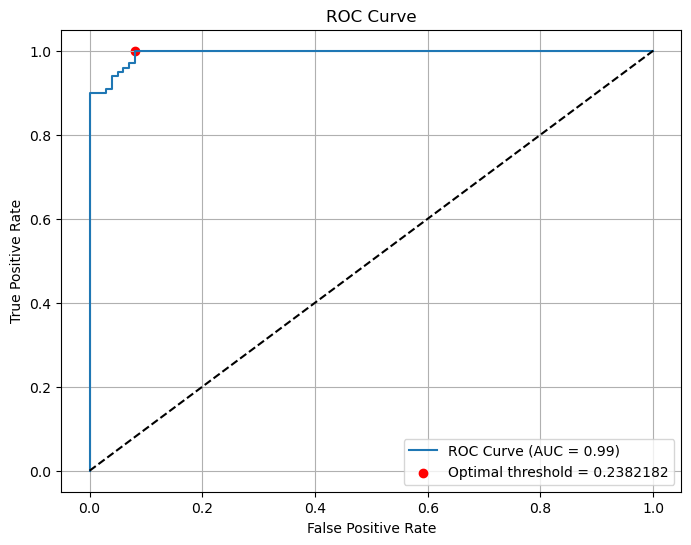

    inference all anomaly: 100%|█████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.42it/s]


    inference all no anomaly: 100%|██████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.40it/s]


    Test dataset: 100%|██████████████████████████████████████████████████████████████████████| 120/120 [00:12<00:00,  9.42it/s]


- OK - Evaluating model (76.80 s)

Dataset               Accuracy
------------------------------
Anonaly lvl 1           100.00
Anonaly lvl 2           100.00
Anonaly lvl 3           100.00

Anomaly all             100.00

No Anomaly Train         91.25
No Anomaly Test          95.00
No Anomaly All           92.00

All without train        99.17
All with train           96.00


In [20]:
# STEPS = 500, MODEL TYPE = MEDIUM, WEIGHT = on
model17 = EfficientAD({**config, "train_steps": 500, "model_type": "medium", "weight_path":"../weights/teacher_medium.pth"})
model17.create_model()
model17.display_eval_result()

- Setting seed to 42
- OK - Setting seed to 42 (0.26 ms)

- Setting datasets path
     Dataset paths: dict_keys(['no_anomaly_train_paths', 'no_anomaly_test_paths', 'no_anomaly_val_paths', 'anomaly_lvl_1_paths', 'anomaly_lvl_2_paths', 'anomaly_lvl_3_paths', 'all_anomaly_paths', 'test_paths', 'all'])
- OK - Setting datasets path (3.26 ms)

- Setting config
     Output folder path: ../output/cookies_3_steps_5000_medium_weighted
- OK - Setting config (0.10 ms)

- Prepare teacher, student & autoencoder
     Loading weight ../weights/teacher_medium.pth
     Training
- OK - Prepare teacher, student & autoencoder (187.94 ms)

- Normalizing teacher


    Computing std of features: 100%|███████████████████████████████████████████████████████████| 72/72 [00:03<00:00, 22.56it/s]


- OK - Normalizing teacher (6.44 s)

- Train


       Current loss: 4.8386  : 100%|███████████████████████████████████████████████████████| 5000/5000 [27:05<00:00,  3.08it/s]


- OK - Train (1625.47 s)

- Saving models to ../output/cookies_3_steps_5000_medium_weighted/all_models.pth
- OK - Saving models (203.16 ms)

- Saving map normalization to ../output/cookies_3_steps_5000_medium_weighted/map_normalization.pth


     Map normalisation: 100%|████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.27it/s]


- OK - Saving map normalization (806.40 ms)

- Evaluating model


     inference all: 100%|████████████████████████████████████████████████████████████████████| 200/200 [00:21<00:00,  9.41it/s]



     - AUC: 100.00%
    - Optimal Threshold: 0.6405318
    - F1 Score: 1.00
    - CONFUSION MATRIX:
 [[100   0]
 [  0 100]] 



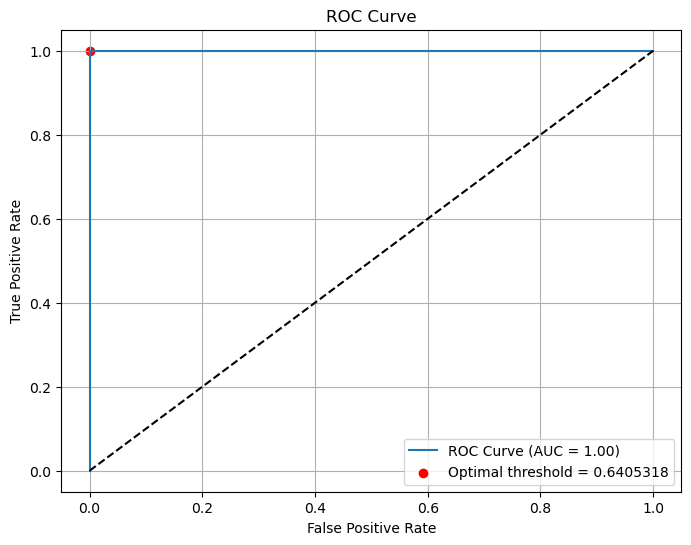

    inference all anomaly: 100%|█████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.40it/s]


    inference all no anomaly: 100%|██████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.37it/s]


    Test dataset: 100%|██████████████████████████████████████████████████████████████████████| 120/120 [00:12<00:00,  9.40it/s]


- OK - Evaluating model (76.85 s)

Dataset               Accuracy
------------------------------
Anonaly lvl 1           100.00
Anonaly lvl 2           100.00
Anonaly lvl 3           100.00

Anomaly all             100.00

No Anomaly Train        100.00
No Anomaly Test         100.00
No Anomaly All          100.00

All without train       100.00
All with train          100.00


In [21]:
# STEPS = 5000, MODEL TYPE = MEDIUM, WEIGHT = on
model18 = EfficientAD({**config, "train_steps": 5000, "model_type": "medium", "weight_path":"../weights/teacher_medium.pth"})
model18.create_model()
model18.display_eval_result()

- Setting seed to 42
- OK - Setting seed to 42 (0.26 ms)

- Setting datasets path
     Dataset paths: dict_keys(['no_anomaly_train_paths', 'no_anomaly_test_paths', 'no_anomaly_val_paths', 'anomaly_lvl_1_paths', 'anomaly_lvl_2_paths', 'anomaly_lvl_3_paths', 'all_anomaly_paths', 'test_paths', 'all'])
- OK - Setting datasets path (3.70 ms)

- Setting config
     Output folder path: ../output/cookies_3_steps_10000_medium_weighted
- OK - Setting config (0.12 ms)

- Prepare teacher, student & autoencoder
     Loading weight ../weights/teacher_medium.pth
     Training
- OK - Prepare teacher, student & autoencoder (185.38 ms)

- Normalizing teacher


    Computing std of features: 100%|███████████████████████████████████████████████████████████| 72/72 [00:03<00:00, 22.40it/s]


- OK - Normalizing teacher (6.46 s)

- Train


       Current loss: 3.0638  : 100%|█████████████████████████████████████████████████████| 10000/10000 [54:11<00:00,  3.08it/s]


- OK - Train (3251.29 s)

- Saving models to ../output/cookies_3_steps_10000_medium_weighted/all_models.pth
- OK - Saving models (205.26 ms)

- Saving map normalization to ../output/cookies_3_steps_10000_medium_weighted/map_normalization.pth


     Map normalisation: 100%|████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.28it/s]


- OK - Saving map normalization (803.15 ms)

- Evaluating model


     inference all: 100%|████████████████████████████████████████████████████████████████████| 200/200 [00:21<00:00,  9.37it/s]



     - AUC: 100.00%
    - Optimal Threshold: 0.5380728
    - F1 Score: 1.00
    - CONFUSION MATRIX:
 [[100   0]
 [  0 100]] 



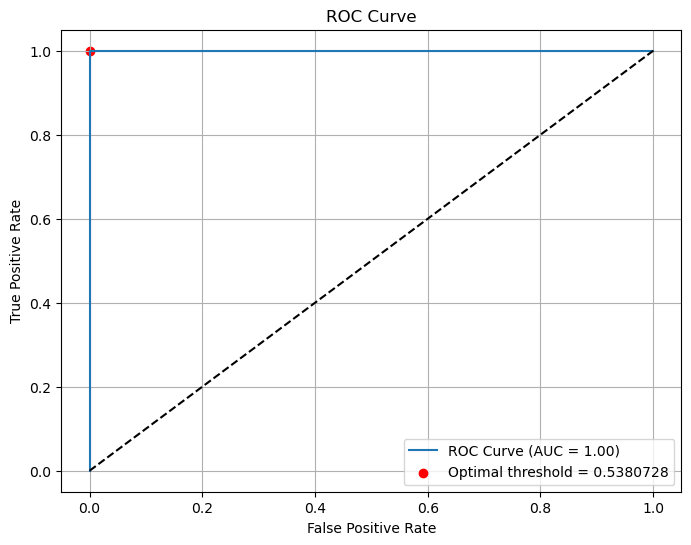

    inference all anomaly: 100%|█████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.37it/s]


    inference all no anomaly: 100%|██████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.38it/s]


    Test dataset: 100%|██████████████████████████████████████████████████████████████████████| 120/120 [00:12<00:00,  9.37it/s]


- OK - Evaluating model (77.06 s)

Dataset               Accuracy
------------------------------
Anonaly lvl 1           100.00
Anonaly lvl 2           100.00
Anonaly lvl 3           100.00

Anomaly all             100.00

No Anomaly Train        100.00
No Anomaly Test         100.00
No Anomaly All          100.00

All without train       100.00
All with train          100.00


In [22]:
# STEPS = 10000, MODEL TYPE = MEDIUM, WEIGHT = on
model19 = EfficientAD({**config, "train_steps": 10000, "model_type": "medium", "weight_path":"../weights/teacher_medium.pth"})
model19.create_model()
model19.display_eval_result()

2024/04/21 14:39:53 INFO mlflow.tracking.fluent: Experiment with name 'cookies_1' does not exist. Creating a new experiment.


- Setting seed to 42
- OK - Setting seed to 42 (0.26 ms)

- Setting datasets path
     Dataset paths: dict_keys(['no_anomaly_train_paths', 'no_anomaly_test_paths', 'no_anomaly_val_paths', 'anomaly_lvl_1_paths', 'anomaly_lvl_2_paths', 'anomaly_lvl_3_paths', 'all_anomaly_paths', 'test_paths', 'all'])
- OK - Setting datasets path (3.15 ms)

- Setting config
     Output folder path: ../output/cookies_1_steps_5000_small_weighted
- OK - Setting config (0.90 ms)

- Prepare teacher, student & autoencoder
     Loading weight ../weights/teacher_small.pth
     Training
- OK - Prepare teacher, student & autoencoder (78.87 ms)

- Normalizing teacher


    Computing std of features: 100%|███████████████████████████████████████████████████████████| 72/72 [00:01<00:00, 53.84it/s]


- OK - Normalizing teacher (2.72 s)

- Train


       Current loss: 5.3975  : 100%|███████████████████████████████████████████████████████| 5000/5000 [10:07<00:00,  8.23it/s]


- OK - Train (607.47 s)

- Saving models to ../output/cookies_1_steps_5000_small_weighted/all_models.pth
- OK - Saving models (80.25 ms)

- Saving map normalization to ../output/cookies_1_steps_5000_small_weighted/map_normalization.pth


     Map normalisation: 100%|████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 29.89it/s]


- OK - Saving map normalization (300.51 ms)

- Evaluating model


     inference all: 100%|████████████████████████████████████████████████████████████████████| 200/200 [00:08<00:00, 23.29it/s]



     - AUC: 97.82%
    - Optimal Threshold: 0.1295042
    - F1 Score: 0.92
    - CONFUSION MATRIX:
 [[88 12]
 [ 5 95]] 



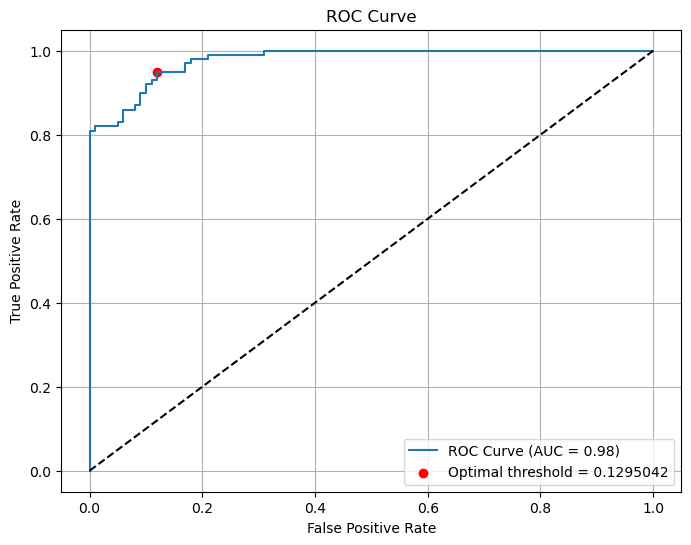

    inference all anomaly: 100%|█████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 23.25it/s]


    inference all no anomaly: 100%|██████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 23.24it/s]


    Test dataset: 100%|██████████████████████████████████████████████████████████████████████| 120/120 [00:05<00:00, 23.25it/s]


- OK - Evaluating model (31.18 s)

Dataset               Accuracy
------------------------------
Anonaly lvl 1           100.00
Anonaly lvl 2           100.00
Anonaly lvl 3            80.00

Anomaly all              95.00

No Anomaly Train         90.00
No Anomaly Test          80.00
No Anomaly All           88.00

All without train        92.50
All with train           91.50


In [23]:
# STEPS = 5000, MODEL TYPE = SMALL, WEIGHT = on Cookies 1
model20 = EfficientAD({**config, "train_steps": 5000, "model_type": "small", "weight_path":"../weights/teacher_small.pth", "subdataset": "cookies_1"})
model20.create_model()
model20.display_eval_result()

### Create model for cookies 2

2024/04/21 14:50:36 INFO mlflow.tracking.fluent: Experiment with name 'cookies_2' does not exist. Creating a new experiment.


- Setting seed to 42
- OK - Setting seed to 42 (0.56 ms)

- Setting datasets path
     Dataset paths: dict_keys(['no_anomaly_train_paths', 'no_anomaly_test_paths', 'no_anomaly_val_paths', 'anomaly_lvl_1_paths', 'anomaly_lvl_2_paths', 'anomaly_lvl_3_paths', 'all_anomaly_paths', 'test_paths', 'all'])
- OK - Setting datasets path (3.68 ms)

- Setting config
     Output folder path: ../output/cookies_2_steps_5000_small_weighted
- OK - Setting config (0.22 ms)

- Prepare teacher, student & autoencoder
     Loading weight ../weights/teacher_small.pth
     Training
- OK - Prepare teacher, student & autoencoder (73.29 ms)

- Normalizing teacher


    Computing std of features: 100%|███████████████████████████████████████████████████████████| 72/72 [00:01<00:00, 54.27it/s]


- OK - Normalizing teacher (2.71 s)

- Train


       Current loss: 5.6100  : 100%|███████████████████████████████████████████████████████| 5000/5000 [10:09<00:00,  8.20it/s]


- OK - Train (609.97 s)

- Saving models to ../output/cookies_2_steps_5000_small_weighted/all_models.pth
- OK - Saving models (81.75 ms)

- Saving map normalization to ../output/cookies_2_steps_5000_small_weighted/map_normalization.pth


     Map normalisation: 100%|████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 29.77it/s]


- OK - Saving map normalization (301.98 ms)

- Evaluating model


     inference all: 100%|████████████████████████████████████████████████████████████████████| 200/200 [00:08<00:00, 23.12it/s]



     - AUC: 99.98%
    - Optimal Threshold: 0.3812251
    - F1 Score: 1.00
    - CONFUSION MATRIX:
 [[ 99   1]
 [  0 100]] 



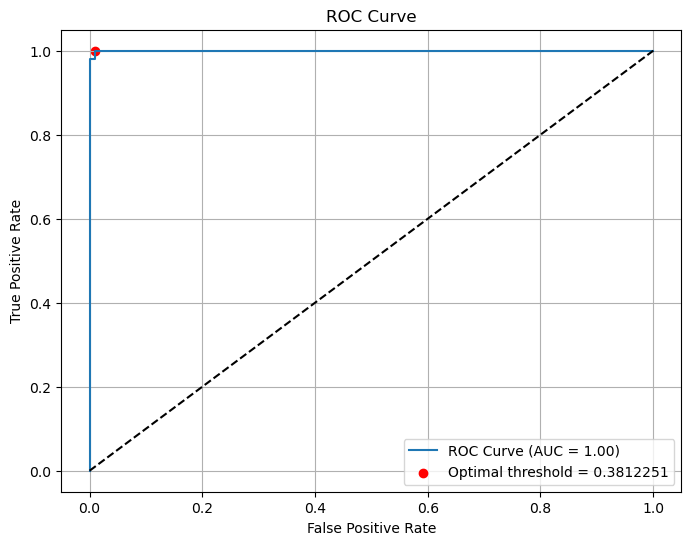

    inference all anomaly: 100%|█████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 23.08it/s]


    inference all no anomaly: 100%|██████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 23.05it/s]


    Test dataset: 100%|██████████████████████████████████████████████████████████████████████| 120/120 [00:05<00:00, 23.08it/s]


- OK - Evaluating model (31.43 s)

Dataset               Accuracy
------------------------------
Anonaly lvl 1           100.00
Anonaly lvl 2           100.00
Anonaly lvl 3           100.00

Anomaly all             100.00

No Anomaly Train        100.00
No Anomaly Test          95.00
No Anomaly All           99.00

All without train        99.17
All with train           99.50


In [24]:
# STEPS = 5000, MODEL TYPE = SMALL, WEIGHT = on Cookies 2
model21 = EfficientAD({**config, "train_steps": 5000, "model_type": "small", "weight_path":"../weights/teacher_small.pth", "subdataset": "cookies_2"})
model21.create_model()
model21.display_eval_result()

### Create model for cookies 1

- Setting seed to 42
- OK - Setting seed to 42 (0.64 ms)

- Setting datasets path
     Dataset paths: dict_keys(['no_anomaly_train_paths', 'no_anomaly_test_paths', 'no_anomaly_val_paths', 'anomaly_lvl_1_paths', 'anomaly_lvl_2_paths', 'anomaly_lvl_3_paths', 'all_anomaly_paths', 'test_paths', 'all'])
- OK - Setting datasets path (2.61 ms)

- Setting config
     Output folder path: ../output/cookies_1_steps_10000_small_weighted
- OK - Setting config (0.39 ms)

- Prepare teacher, student & autoencoder
     Loading weight ../weights/teacher_small.pth
     Training
- OK - Prepare teacher, student & autoencoder (74.02 ms)

- Normalizing teacher


    Computing std of features: 100%|███████████████████████████████████████████████████████████| 72/72 [00:01<00:00, 54.76it/s]


- OK - Normalizing teacher (2.70 s)

- Train


       Current loss: 3.2799  : 100%|█████████████████████████████████████████████████████| 10000/10000 [20:13<00:00,  8.24it/s]


- OK - Train (1213.83 s)

- Saving models to ../output/cookies_1_steps_10000_small_weighted/all_models.pth
- OK - Saving models (82.12 ms)

- Saving map normalization to ../output/cookies_1_steps_10000_small_weighted/map_normalization.pth


     Map normalisation: 100%|████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 29.33it/s]


- OK - Saving map normalization (306.06 ms)

- Evaluating model


     inference all: 100%|████████████████████████████████████████████████████████████████████| 200/200 [00:08<00:00, 22.98it/s]



     - AUC: 98.22%
    - Optimal Threshold: 0.1656640
    - F1 Score: 0.94
    - CONFUSION MATRIX:
 [[91  9]
 [ 4 96]] 



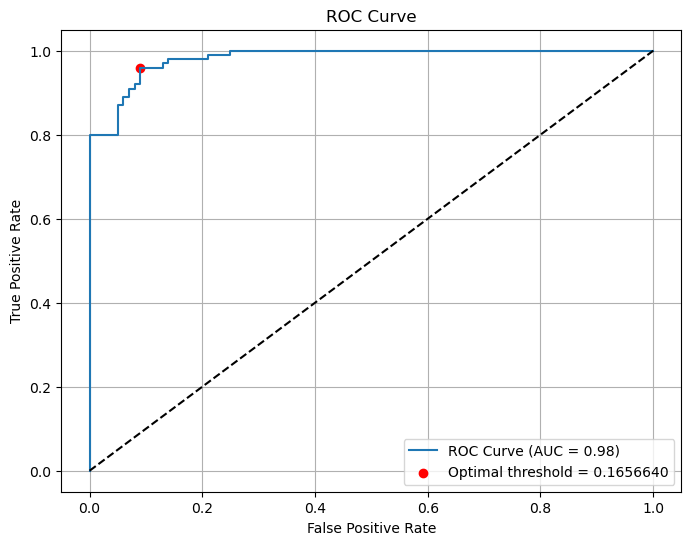

    inference all anomaly: 100%|█████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 23.20it/s]


    inference all no anomaly: 100%|██████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 23.07it/s]


    Test dataset: 100%|██████████████████████████████████████████████████████████████████████| 120/120 [00:05<00:00, 23.00it/s]


- OK - Evaluating model (31.40 s)

Dataset               Accuracy
------------------------------
Anonaly lvl 1           100.00
Anonaly lvl 2           100.00
Anonaly lvl 3            84.00

Anomaly all              96.00

No Anomaly Train         93.75
No Anomaly Test          80.00
No Anomaly All           91.00

All without train        93.33
All with train           93.50


In [25]:
# STEPS = 10000, MODEL TYPE = SMALL, WEIGHT = on Cookies 1
model22 = EfficientAD({**config, "train_steps": 10000, "model_type": "small", "weight_path":"../weights/teacher_small.pth", "subdataset": "cookies_1"})
model22.create_model()
model22.display_eval_result()